In [1]:
import json
import requests # It is a popular HTTP library for HTTP requests in Python
import pandas as pd # It is a powerful, open-source data manipulation and analysis library for Python
from datetime import datetime # The datetime module supplies classes to work with date and time
import matplotlib.pyplot as plt # For Data visualisation
import seaborn as sns # For Data visualisation
import psycopg2 # For connecting to PstgreSQL databases and executing queries.
from sqlalchemy import create_engine # To efficiently manage and reuse database connections

In [8]:
# Get the Lagos, Nigeria weather data from API
# api_key = "b9dab5592fc70d724396c875e5c0dbd8"
# lat = 52.950001
# lon = -1.150000
# city = "Lagos,NG"
# cnt = 240 #240 hours (10 days) forcast
url = f"https://api.open-meteo.com/v1/forecast?latitude=52.9536&longitude=-1.1505&daily=temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,rain_sum,showers_sum,snowfall_sum,wind_speed_10m_max&timezone=Europe%2FLondon"

response = requests.get(url)

In [9]:
data = response.json()
json_str = json.dumps(data, indent=4)
print(json_str)

{
    "latitude": 52.96,
    "longitude": -1.1600001,
    "generationtime_ms": 0.3260374069213867,
    "utc_offset_seconds": 0,
    "timezone": "Europe/London",
    "timezone_abbreviation": "GMT",
    "elevation": 51.0,
    "daily_units": {
        "time": "iso8601",
        "temperature_2m_max": "\u00b0C",
        "temperature_2m_min": "\u00b0C",
        "apparent_temperature_max": "\u00b0C",
        "apparent_temperature_min": "\u00b0C",
        "daylight_duration": "s",
        "sunshine_duration": "s",
        "rain_sum": "mm",
        "showers_sum": "mm",
        "snowfall_sum": "cm",
        "wind_speed_10m_max": "km/h"
    },
    "daily": {
        "time": [
            "2023-12-19",
            "2023-12-20",
            "2023-12-21",
            "2023-12-22",
            "2023-12-23",
            "2023-12-24",
            "2023-12-25"
        ],
        "temperature_2m_max": [
            12.1,
            10.8,
            12.2,
            10.3,
            10.5,
            

In [6]:
# Create a function to convert temperature from Kelvin to celsius
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

In [26]:
# Python Program to Convert seconds
# into hours, minutes and seconds

def convert(seconds):
	min, sec = divmod(seconds, 60)
	hour, min = divmod(min, 60)
	return '%d:%02d:%02d' % (hour, min, sec)

In [77]:
data = response.json()
weather_data = []
count = 0
for day in data['daily']['time']:
    time = data['daily']['time'][count]
    temp_max = data['daily']['temperature_2m_max'][count]
    temp_min = data['daily']['temperature_2m_min'][count]
    daylight = convert(data['daily']['daylight_duration'][count])
    sunshine = convert(data['daily']['sunshine_duration'][count])
    # daylight = data['daily']['daylight_duration'][count]
    # sunshine = data['daily']['sunshine_duration'][count]
    rain_vol = data['daily']['rain_sum'][count]
    snowfall = data['daily']['snowfall_sum'][count]
    wind_speed = data['daily']['wind_speed_10m_max'][count]

        
    weather_data.append({
        "Date": time,
        "Max Temperature": temp_max,
        "Min Temperature": temp_min,
        "Daylight Duration": daylight,
        "Sunshine Duration": sunshine,
        "Rain Volumn (mm)": rain_vol,
        "Snowfall (cm)": snowfall,
        "Wind Speed": wind_speed    
        })
    count += 1
        
    df = pd.DataFrame(weather_data)
    
df.head(10)

,Date,Max Temperature,Min Temperature,Daylight Duration,Sunshine Duration,Rain Volumn (mm),Snowfall (cm),Wind Speed
0,2023-12-19,12.1,6.3,7:34:33,1:55:34,11.3,0.0,14.1
1,2023-12-20,10.8,6.3,7:34:17,0:00:00,0.0,0.0,19.7
2,2023-12-21,12.2,9.8,7:34:07,2:26:25,0.0,0.0,27.2
3,2023-12-22,10.3,9.4,7:34:05,0:00:00,1.0,0.0,25.0
4,2023-12-23,10.5,8.9,7:34:10,5:40:40,0.9,0.0,24.0
5,2023-12-24,12.8,9.6,7:34:23,0:00:00,1.5,0.0,33.0
6,2023-12-25,9.8,5.1,7:34:44,4:35:11,0.0,0.0,32.6


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               7 non-null      object 
 1   Max Temperature    7 non-null      float64
 2   Min Temperature    7 non-null      float64
 3   Daylight Duration  7 non-null      object 
 4   Sunshine Duration  7 non-null      object 
 5   Rain Volumn (mm)   7 non-null      float64
 6   Snowfall (cm)      7 non-null      float64
 7   Wind Speed         7 non-null      float64
dtypes: float64(5), object(3)
memory usage: 580.0+ bytes


In [67]:
average_value = df['Min Temperature'].mean()

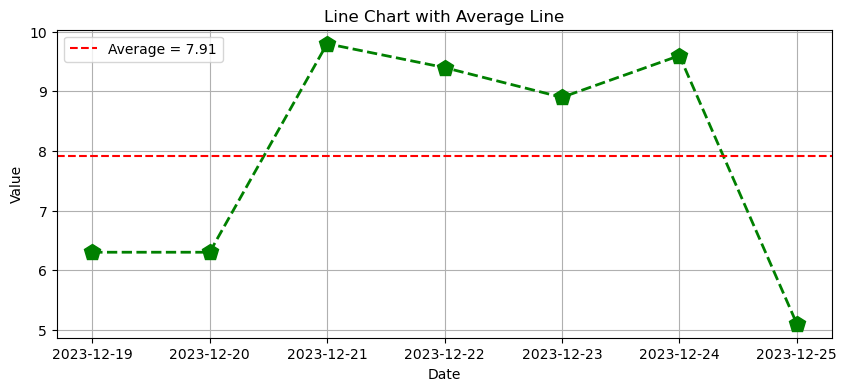

In [68]:
plt.figure(figsize=(10,4))
plt.plot(df['Date'], df['Min Temperature'], color='green', marker='p', linestyle='dashed', linewidth=2, markersize=12)
plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average = {average_value:.2f}')
plt.title('Line Chart with Average Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left') # Add a legend
plt.grid(True)
plt.show()

In [73]:
# Database Credentials
from sqlalchemy import create_engine
import os
import psycopg2

# Database Credentials
username = os.environ['USER']
password = os.environ['PASS']
host = 'localhost'
port = 5433
db_name = 'Weather_Data'

In [74]:
# Establish a connection
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{db_name}')

In [75]:
#Load the database table - employee_table

df.to_sql('weather_data', engine, if_exists='replace', index=False)

# Close the connection
engine.dispose()